This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Load ODIM_H5 Volume data from German Weather Service

In this example, we obtain and read the latest 2 hours of available volumetric radar data from German Weather Service available at [opendata.dwd.de](https://opendata.dwd.de). Finally we do some plotting.

This retrieves 24 timesteps of the 10 sweeps (moments DBZH and VRADH) of the DWD volume scan of a distinct radar. This amounts to 240 data files which are combined into one volumetric Cf/Radial2 like xarray powered structure.

Exports to single file Odim_H5 and Cf/Radial2 format are shown at the end of this tutorial.

<div class="alert alert-warning">

**Note** <br>

The used `open_odim` implementation is based on [netcdf4](https://unidata.github.io/netcdf4-python/), [h5py](https://www.h5py.org/), [h5netcdf](https://github.com/shoyer/h5netcdf) and [Xarray](http://xarray.pydata.org/en/stable/). It claims multiple data files and presents them in a simple structure. See also the notebook [wradlib_odim_multi_file_dataset](wradlib_odim_multi_file_dataset.ipynb) for further details.

</div>

In [1]:
import wradlib as wrl
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
import numpy as np
import xarray as xr
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
from wradlib.io.xarray import open_odim, CfRadial   

In [2]:
import urllib3
import os
import io
import glob
import shutil
import datetime

## Download Current Filelist from server

Export to list and sort it descending in time.

### Helper Class to parse response

In [3]:
from html.parser import HTMLParser

class DWDHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        if tag != 'a':
            return
        self.links.append(attrs[0][1])

parser = DWDHTMLParser()

In [4]:
radar = 'ESS'
DBZH = 'sweep_vol_z'
VRADH = 'sweep_vol_v'

import certifi
opendata_url1 = (f"https://opendata.dwd.de/weather/radar/sites/{DBZH}/{radar.lower()}/hdf5/")

http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
response = http.request('GET', opendata_url1).data.decode("utf-8")

parser.links = []
parser.feed(response)
filelist1 = parser.links[1:]

filelist1.sort(key=lambda x: x.split('-')[2])
filelist1.reverse()

opendata_url2 = (f"https://opendata.dwd.de/weather/radar/sites/{VRADH}/{radar.lower()}/hdf5/")

http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
response = http.request('GET', opendata_url2).data.decode("utf-8")

parser.links = []
parser.feed(response)
filelist2 = parser.links[1:]

filelist2.sort(key=lambda x: x.split('-')[2])
filelist2.reverse()

In [5]:
for f in filelist1[:10*24]:
    print(f)

ras07-vol5minng01_sweeph5onem_dbzh_04-2020090718322900-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_03-2020090718320600-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_02-2020090718314300-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_01-2020090718312000-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_00-2020090718305600-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_09-2020090718290100-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_08-2020090718284800-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_07-2020090718283500-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_06-2020090718282100-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_05-2020090718280000-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_04-2020090718272900-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_03-2020090718270600-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_02-2020090718264300-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh_01-2020090718262000-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_dbzh

In [6]:
for f in filelist2[:10*24]:
    print(f)

ras07-vol5minng01_sweeph5onem_vradh_04-2020090718322900-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_03-2020090718320600-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_02-2020090718314300-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_01-2020090718312000-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_00-2020090718305600-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_09-2020090718290100-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_08-2020090718284800-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_07-2020090718283500-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_06-2020090718282100-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_05-2020090718280000-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_04-2020090718272900-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_03-2020090718270600-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_02-2020090718264300-ess-10410-hd5
ras07-vol5minng01_sweeph5onem_vradh_01-2020090718262000-ess-10410-hd5
ras07-vol5minng01_sw

## Clean up local folder

In [7]:
flist = glob.glob('ras07*')
for f in flist:
    os.remove(f)

## Download latest 24 volumes to current directory

In [8]:
for f in filelist1[:10*24]:
    with http.request('GET', os.path.join(opendata_url1, f), preload_content=False) as r, open(f, 'wb') as out:       
        shutil.copyfileobj(r, out)

for f in filelist2[:10*24]:
    with http.request('GET', os.path.join(opendata_url2, f), preload_content=False) as r, open(f, 'wb') as out:       
        shutil.copyfileobj(r, out)        

## Read the files into xarray powered structure

In [9]:
flist = glob.glob('ras07*')
vol = wrl.io.open_odim(flist)

Open:   0%|          | 0/480 [00:00<?, ? Files/s]

Open:   9%|▉         | 43/480 [00:00<00:01, 422.74 Files/s]

Open:  18%|█▊        | 85/480 [00:00<00:00, 400.98 Files/s]

Open:  28%|██▊       | 134/480 [00:00<00:00, 422.99 Files/s]

Open:  38%|███▊      | 184/480 [00:00<00:00, 442.31 Files/s]

Open:  46%|████▋     | 223/480 [00:00<00:00, 422.46 Files/s]

Open:  56%|█████▋    | 271/480 [00:00<00:00, 438.05 Files/s]

Open:  66%|██████▋   | 318/480 [00:00<00:00, 446.38 Files/s]

Open:  77%|███████▋  | 369/480 [00:00<00:00, 462.07 Files/s]

Open:  86%|████████▋ | 415/480 [00:00<00:00, 459.33 Files/s]

Open:  96%|█████████▌| 460/480 [00:01<00:00, 447.46 Files/s]

Open: 100%|██████████| 480/480 [00:01<00:00, 437.63 Files/s]


Collecting:   0%|          | 0/10 [00:00<?, ? Angles/s]

Collecting: 100%|██████████| 10/10 [00:00<00:00, 138.89 Angles/s]

## Inspect structure
### Root Group

In [10]:
vol.root

<xarray.Dataset>
Dimensions:              (sweep: 10)
Dimensions without coordinates: sweep
Data variables:
    volume_number        int64 0
    platform_type        <U5 'fixed'
    instrument_type      <U5 'radar'
    primary_axis         <U6 'axis_z'
    time_coverage_start  <U20 '2020-09-07T16:32:30Z'
    time_coverage_end    <U20 '2020-09-07T18:32:29Z'
    latitude             float64 51.41
    longitude            float64 6.967
    altitude             float64 185.1
    sweep_group_name     (sweep) <U7 'sweep_0' 'sweep_1' ... 'sweep_8' 'sweep_9'
    sweep_fixed_angle    (sweep) float64 0.5 8.0 12.0 17.0 ... 4.5 3.5 2.5 1.5
Attributes:
    version:          H5rad 2.2
    title:            None
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          im/exported using wradlib
    instrument_name:  None
    Conventions:      ODIM_H5/V2_2

In [11]:
vol.root.sweep_fixed_angle

<xarray.DataArray 'sweep_fixed_angle' (sweep: 10)>
array([ 0.5,  8. , 12. , 17. , 25. ,  5.5,  4.5,  3.5,  2.5,  1.5])
Dimensions without coordinates: sweep

### Sweep Groups

In [12]:
list(vol)

[<wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 180)
 Elevation(s): (0.5),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 124)
 Elevation(s): (8.0),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 60)
 Elevation(s): (12.0),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 60)
 Elevation(s): (17.0),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 60)
 Elevation(s): (25.0),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 180)
 Elevation(s): (5.5),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 180)
 Elevation(s): (4.5),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 180)
 Elevation(s): (3.5),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 180)
 Elevation(s): (2.5),
 <wradlib.XRadTimeSeries>
 Dimension(s): (time: 24, azimuth: 360, range: 180)
 Elevation(s): (1.5)]

In [13]:
vol[0]

<wradlib.XRadTimeSeries>
Dimension(s): (time: 24, azimuth: 360, range: 180)
Elevation(s): (0.5)

## plot sweeps
### DBZH

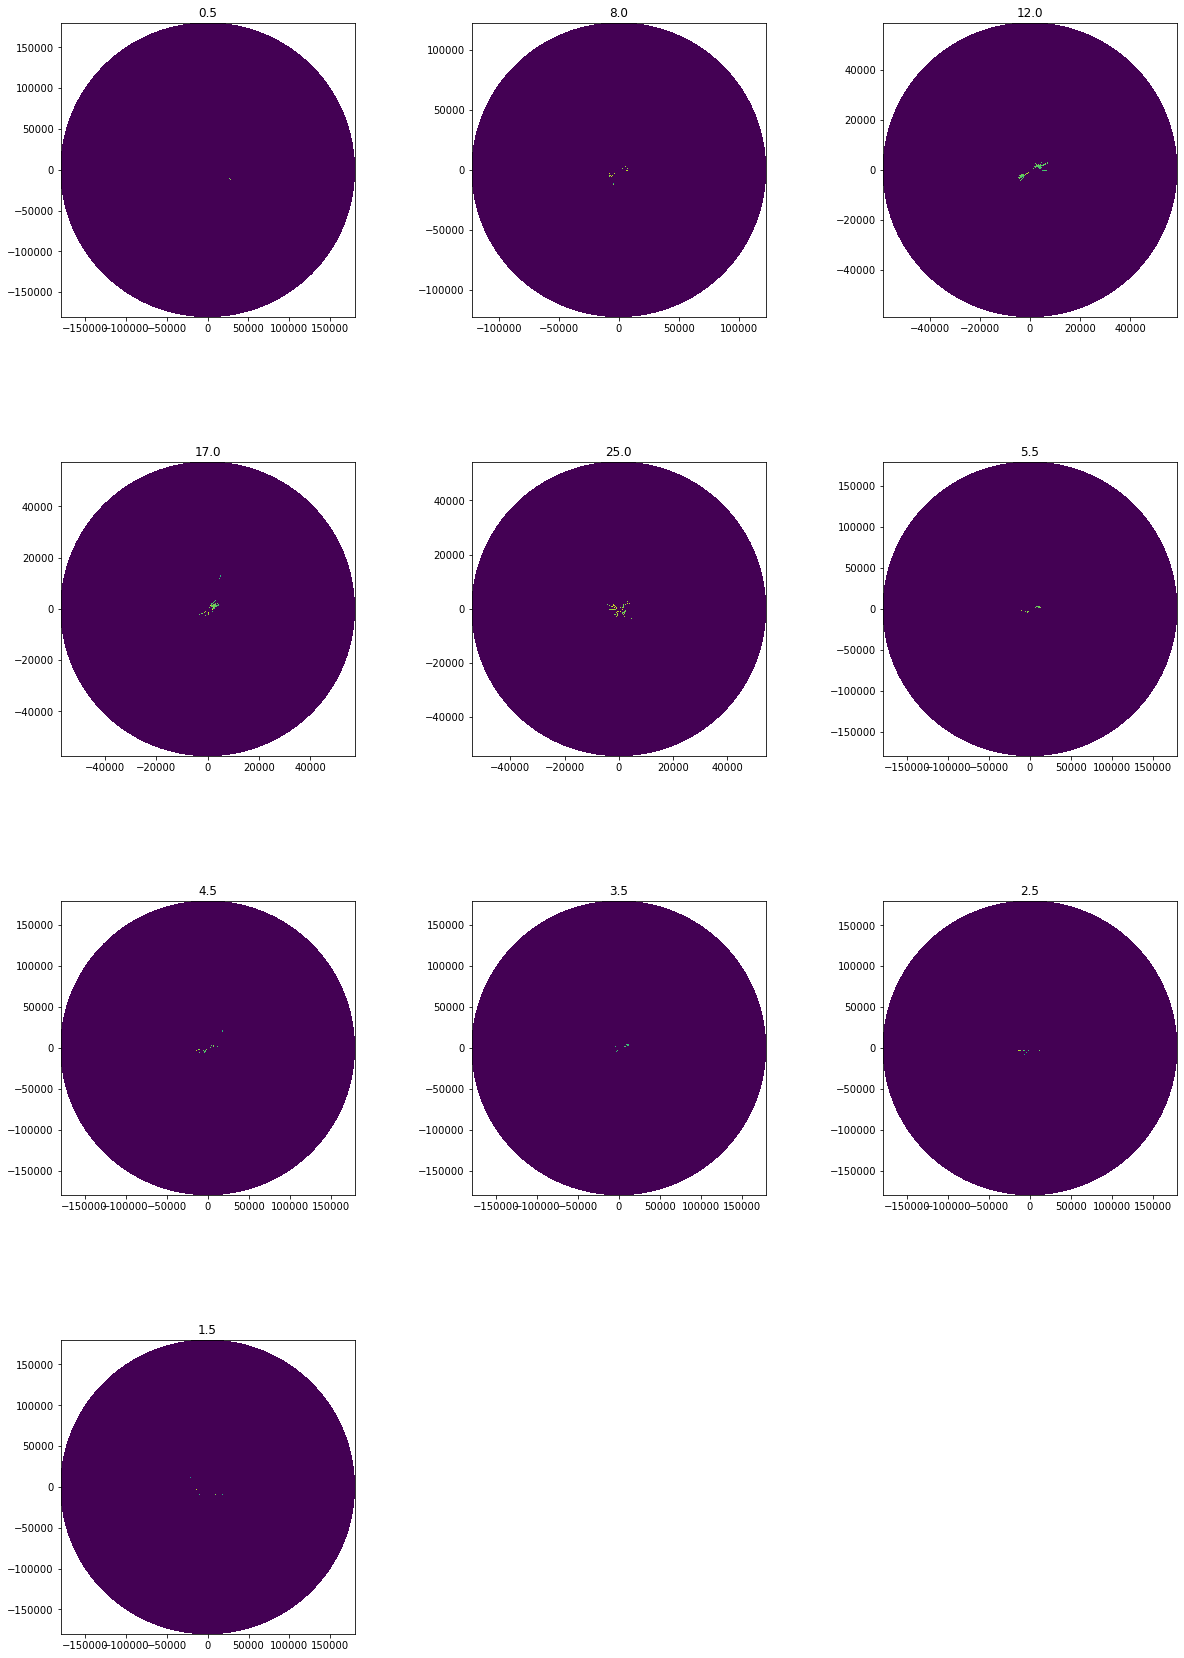

In [14]:
fig = pl.figure(figsize=(20, 30))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(4, 3, wspace=0.4, hspace=0.4)
for i, ts in enumerate(vol):
    swp = ts[0]
    swp.data.DBZH.pipe(wrl.georef.georeference_dataset).wradlib.plot(ax=gs[i], fig=fig)
    ax = pl.gca()
    ax.set_title(vol.root.sweep_fixed_angle[i].values)

### VRADH

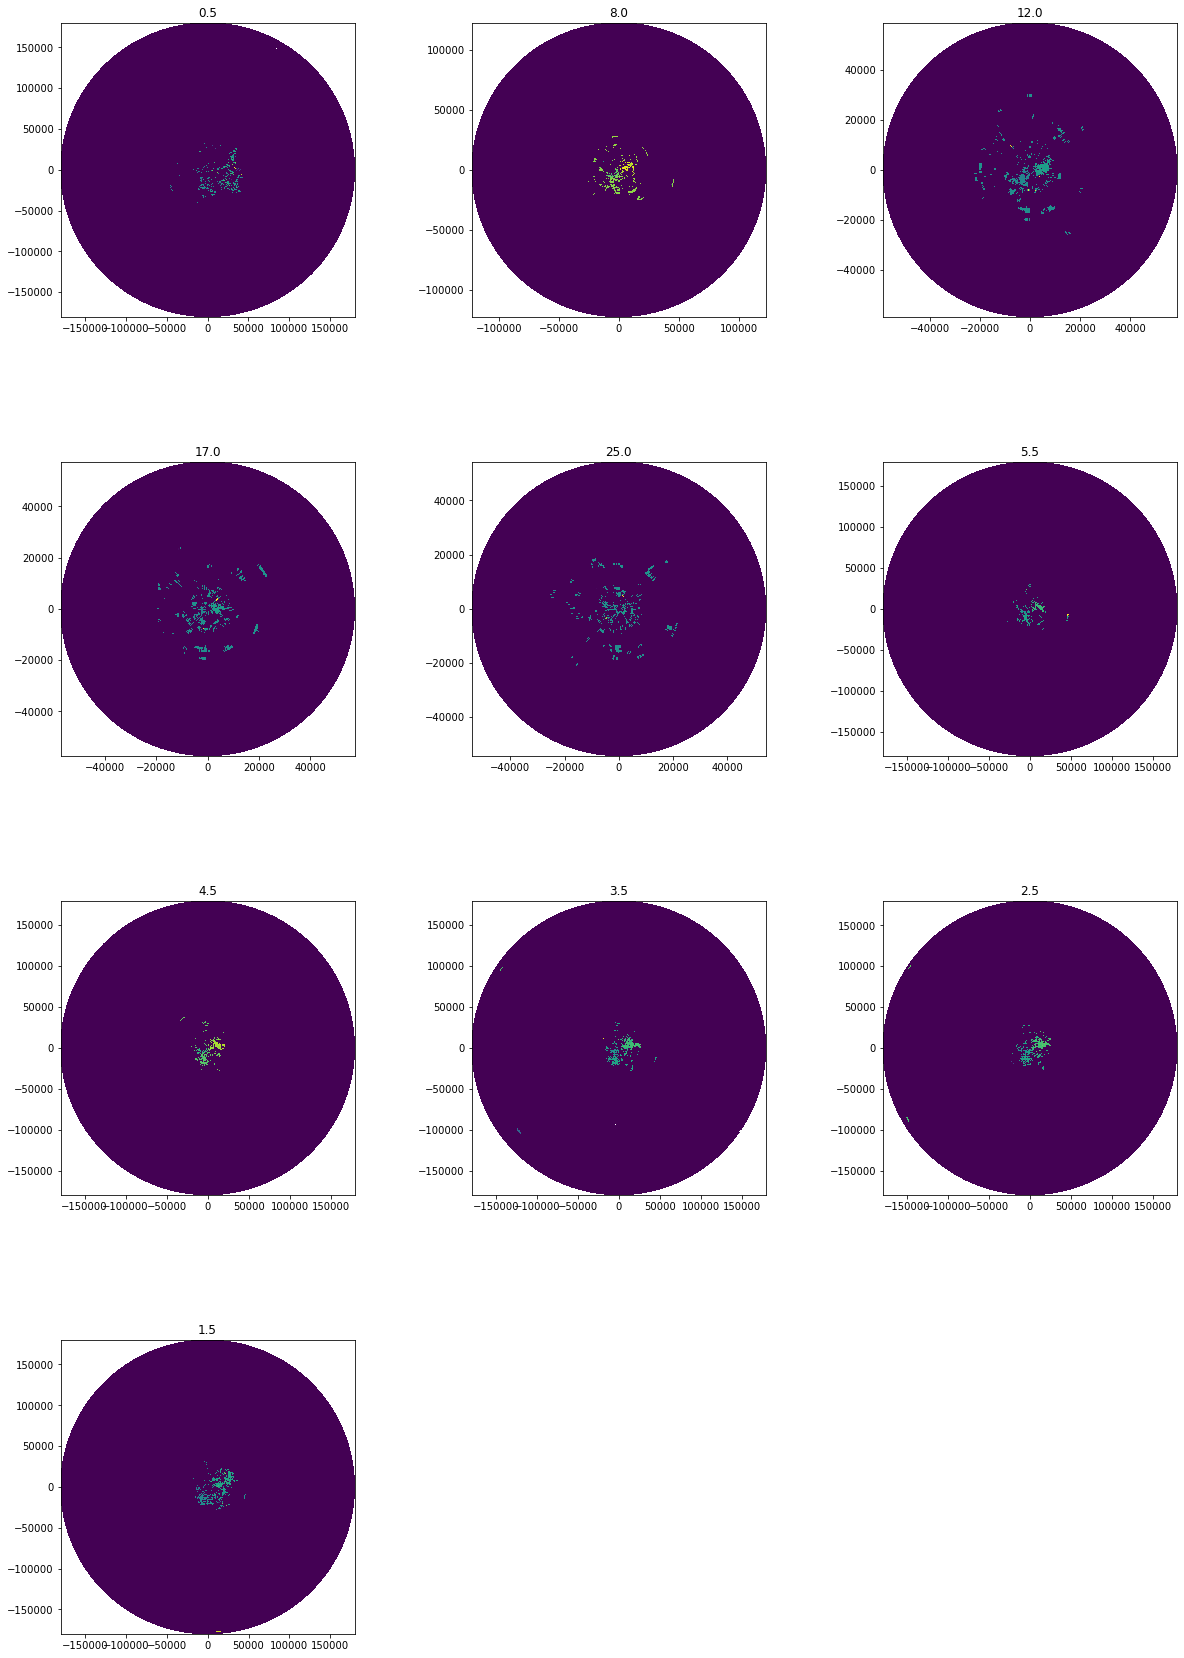

In [15]:
fig = pl.figure(figsize=(20, 30))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(4, 3, wspace=0.4, hspace=0.4)
for i, ts in enumerate(vol):
    swp = ts[0]
    swp.data.VRADH.pipe(wrl.georef.georeference_dataset).wradlib.plot(ax=gs[i], fig=fig)
    ax = pl.gca()
    ax.set_title(vol.root.sweep_fixed_angle[i].values)

### Plot single sweep using cartopy

In [16]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

map_trans = ccrs.AzimuthalEquidistant(central_latitude=vol.root.latitude.values, 
                                      central_longitude=vol.root.longitude.values)

In [17]:
vol[-1].data

Collecting:   0%|          | 0/24 [00:00<?, ? Timesteps/s]

Collecting:  21%|██        | 5/24 [00:00<00:00, 46.46 Timesteps/s]

Collecting:  38%|███▊      | 9/24 [00:00<00:00, 43.68 Timesteps/s]

Collecting:  54%|█████▍    | 13/24 [00:00<00:00, 42.25 Timesteps/s]

Collecting:  71%|███████   | 17/24 [00:00<00:00, 41.11 Timesteps/s]

Collecting:  88%|████████▊ | 21/24 [00:00<00:00, 40.28 Timesteps/s]

Collecting: 100%|██████████| 24/24 [00:00<00:00, 39.94 Timesteps/s]

<xarray.Dataset>
Dimensions:     (azimuth: 360, range: 180, time: 24)
Coordinates:
    altitude    float64 185.1
    elevation   (azimuth) float64 1.505 1.505 1.505 1.505 ... 1.505 1.505 1.505
    longitude   float64 6.967
    sweep_mode  <U20 'azimuth_surveillance'
    latitude    float64 51.41
  * range       (range) float32 500.0 1500.0 2500.0 ... 178500.0 179500.0
  * azimuth     (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time        (time) datetime64[ns] 2020-09-07T16:37:06 ... 2020-09-07T18:3...
    rtime       (time, azimuth) datetime64[ns] 2020-09-07T16:37:23.929999872 ...
Data variables:
    DBZH        (time, azimuth, range) float32 -64.00293 -64.00293 ... -64.00293
    VRADH       (time, azimuth, range) float32 -32.135292 ... -32.135292

< GeoAxes: <cartopy.crs.AzimuthalEquidistant object at 0x7fa74a3bbf40> >


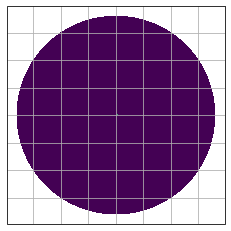

In [18]:
map_proj = ccrs.AzimuthalEquidistant(central_latitude=vol.root.latitude.values, 
                                      central_longitude=vol.root.longitude.values)
pm = vol[-1][0].data.pipe(wrl.georef.georeference_dataset).DBZH.wradlib.plot_ppi(proj=map_proj)
ax = pl.gca()
ax.gridlines(crs=map_proj)
print(ax)

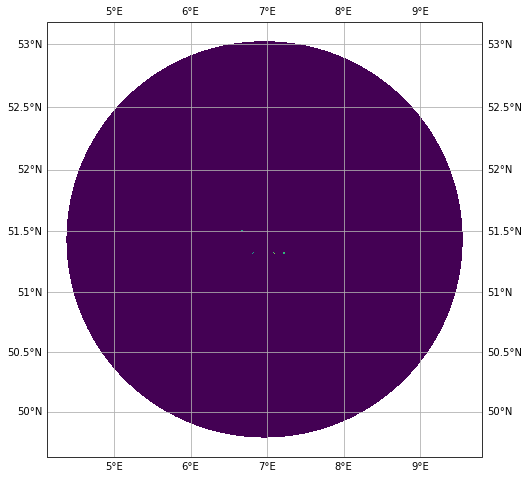

In [19]:
map_proj = ccrs.Mercator(central_longitude=vol.root.longitude.values)
fig = pl.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection=map_proj)
pm = vol[-1][0].data.pipe(wrl.georef.georeference_dataset).DBZH.wradlib.plot_ppi(ax=ax)
ax.gridlines(draw_labels=True)

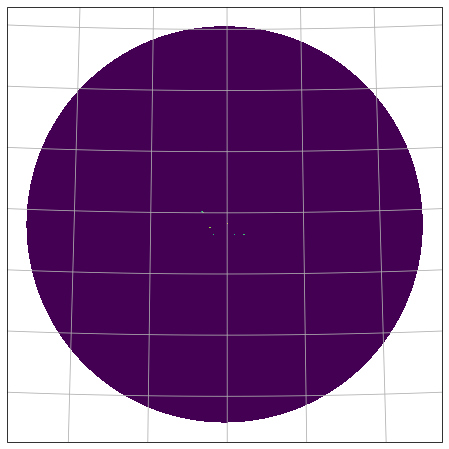

In [20]:
fig = pl.figure(figsize=(10, 8))
proj=ccrs.AzimuthalEquidistant(central_latitude=vol.root.latitude.values, 
                               central_longitude=vol.root.longitude.values)
ax = fig.add_subplot(111, projection=proj)
pm = vol[-1][0].data.DBZH.wradlib.plot_ppi(ax=ax)
ax.gridlines()

### Inspect radar moments

The dataarrays can be accessed by key or by attribute. Each dataarray has the datasets dimensions and coordinates of it's parent dataset. There are attributes connected which are defined by Cf/Radial and/or ODIM_H5 standard.

In [21]:
vol[-1][0].data.DBZH

<xarray.DataArray 'DBZH' (azimuth: 360, range: 180)>
array([[-64.00293, -64.00293, -64.00293, ..., -64.00293, -64.00293, -64.00293],
       [-64.00293, -64.00293, -64.00293, ..., -64.00293, -64.00293, -64.00293],
       [-64.00293, -64.00293, -64.00293, ..., -64.00293, -64.00293, -64.00293],
       ...,
       [-64.00293, -64.00293, -64.00293, ..., -64.00293, -64.00293, -64.00293],
       [-64.00293, -64.00293, -64.00293, ..., -64.00293, -64.00293, -64.00293],
       [-64.00293, -64.00293, -64.00293, ..., -64.00293, -64.00293, -64.00293]],
      dtype=float32)
Coordinates:
  * azimuth     (azimuth) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
    time        datetime64[ns] ...
    elevation   (azimuth) float64 ...
    rtime       (azimuth) datetime64[ns] ...
  * range       (range) float32 500.0 1500.0 2500.0 ... 178500.0 179500.0
    sweep_mode  <U20 ...
    latitude    float64 ...
    longitude   float64 ...
    altitude    float64 ...
    x           (azimuth, range) float64 4.362 13.08 ... -1.556e+03 -1.565e+03
    y           (azimuth, range) float64 499.8 1.499e+03 ... 1.783e+05 1.793e+05
    z           (azimuth, range) float64 198.1 224.4 ... 6.748e+03 6.795e+03
    gr          (azimuth, range) float64 499.8 1.499e+03 ... 1.783e+05 1.793e+05
    rays        (azimuth, range) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins        (azimuth, range) float32 500.0 1500.0 ... 178500.0 179500.0
Attributes:
    _Undetect:      0.0
    standard_name:  radar_equivalent_reflectivity_factor_h
    long_name:      Equivalent reflectivity factor H
    units:          dBZ

In [22]:
vol[-1][0].data.sweep_mode

<xarray.DataArray 'sweep_mode' ()>
array('azimuth_surveillance', dtype='<U20')
Coordinates:
    time        datetime64[ns] ...
    sweep_mode  <U20 ...
    latitude    float64 ...
    longitude   float64 ...
    altitude    float64 ...

In [23]:
vol.root

<xarray.Dataset>
Dimensions:              (sweep: 10)
Dimensions without coordinates: sweep
Data variables:
    volume_number        int64 0
    platform_type        <U5 'fixed'
    instrument_type      <U5 'radar'
    primary_axis         <U6 'axis_z'
    time_coverage_start  <U20 '2020-09-07T16:32:30Z'
    time_coverage_end    <U20 '2020-09-07T18:32:29Z'
    latitude             float64 51.41
    longitude            float64 6.967
    altitude             float64 185.1
    sweep_group_name     (sweep) <U7 'sweep_0' 'sweep_1' ... 'sweep_8' 'sweep_9'
    sweep_fixed_angle    (sweep) float64 0.5 8.0 12.0 17.0 ... 4.5 3.5 2.5 1.5
Attributes:
    version:          H5rad 2.2
    title:            None
    institution:      None
    references:       None
    source:           None
    history:          None
    comment:          im/exported using wradlib
    instrument_name:  None
    Conventions:      ODIM_H5/V2_2

# Plot Quasi Vertical Profile

In [24]:
vol

<wradlib.XRadVolume>
Dimension(s): (sweep: 10)
Elevation(s): (0.5, 8.0, 12.0, 17.0, 25.0, 5.5, 4.5, 3.5, 2.5, 1.5)

In [25]:
ts = vol[-1]
ts

<wradlib.XRadTimeSeries>
Dimension(s): (time: 24, azimuth: 360, range: 180)
Elevation(s): (1.5)

(0.0, 20000.0)

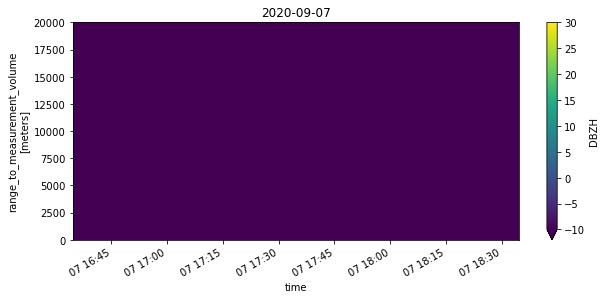

In [26]:
fig = pl.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ts.data.DBZH.median('azimuth').plot(x='time', vmin=-10, vmax=30, ax=ax)
ax.set_title(f"{np.datetime_as_string(ts.data.time[0].values, unit='D')}")
ax.set_ylim(0, 20000)

## Export to OdimH5

This exports the radar volume at given timestep including all moments into one ODIM_H5 compliant data file.

In [27]:
vol.to_odim('dwd_odim.h5', timestep=0)

## Export to Cf/Radial2

This exports the radar volume at given timestep including all moments into one Cf/Radial2 compliant data file.

In [28]:
vol.to_cfradial2('dwd_cfradial2.nc', timestep=0)

## Import again and check equality

Small time differences are possible so drop times before comparison

In [29]:
try:
    vol1 = open_odim('dwd_odim.h5')
    vol2 = CfRadial('dwd_cfradial2.nc', dim0='azimuth')
    xr.testing.assert_equal(vol1.root, vol2.root)
    xr.testing.assert_equal(vol1[1][0].data.drop('time').rename({'rtime': 'time'}), vol2['sweep_1'])
    print("Equality Check successful")
except:
    print("Equality Check not successful")

Open:   0%|          | 0/1 [00:00<?, ? Files/s]

Open: 100%|██████████| 1/1 [00:00<00:00, 62.95 Files/s]


Collecting:   0%|          | 0/10 [00:00<?, ? Angles/s]

Collecting: 100%|██████████| 10/10 [00:00<00:00, 3088.36 Angles/s]

Equality Check not successful
